*`torchvision` - base domain library for Pytorch computer vision
*`torchvision.datasets` - get datasets and data loading functions for computer vision here
*`torchvision.models` - get pretrained computer vision models that you can leverage or your own problems
*`torchvision.transforms` - functions for manipulating your vision data (images) into suitable for use in model
*`torch.utils.data.Dataset` - Base dataset class for pytorch
*`torch.utils.data.DataLoader` - creates a python interable over a dataset

In [1]:
import torch 
from torch import nn

import torchvision 
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
torch.__version__, torchvision.__version__

('2.9.1+cu128', '0.24.1+cu128')

In [5]:
# Getting a dataset
# Fashion MNIST dataset

train_dataset = datasets.FashionMNIST(
    root="data",
    train=True, # train data
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False, # train data
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None
)

In [6]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [7]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
image = train_dataset[0][0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [14]:
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '9')

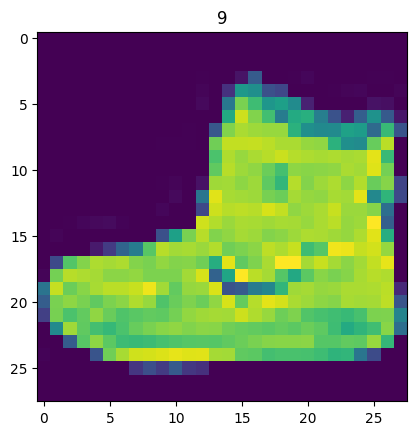

In [21]:
# visualise
image, label = train_dataset[0]
plt.imshow(image.squeeze())
plt.title(label)

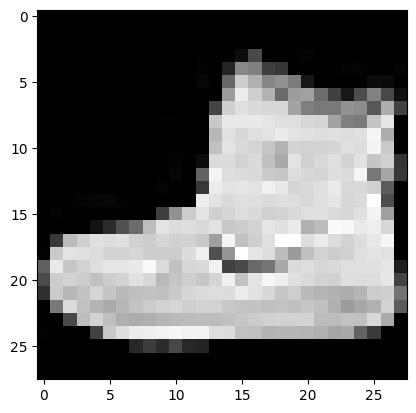

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

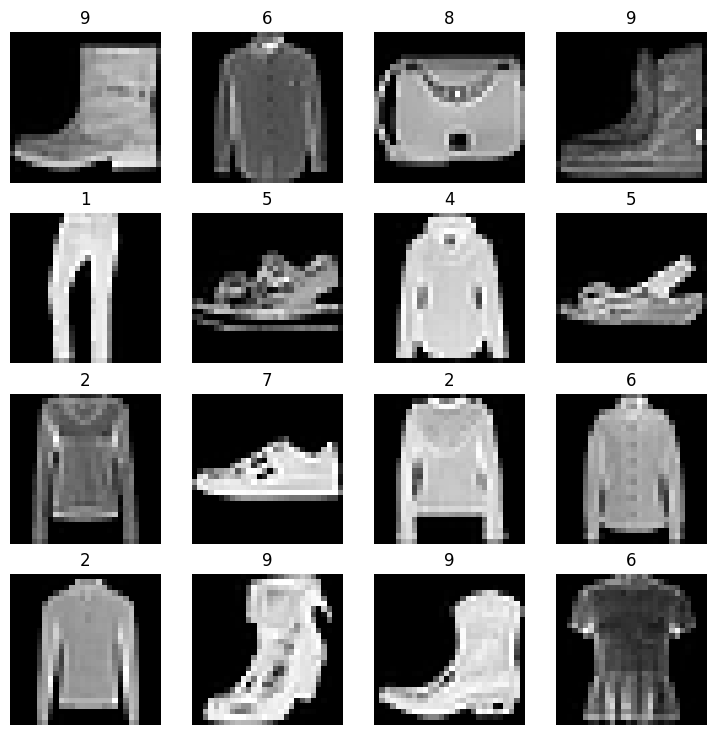

In [28]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [30]:
print(f"Dataloaders: {train_dataset, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32")

Dataloaders: (Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor(), <torch.utils.data.dataloader.DataLoader object at 0x7fde4d753a90>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [32]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

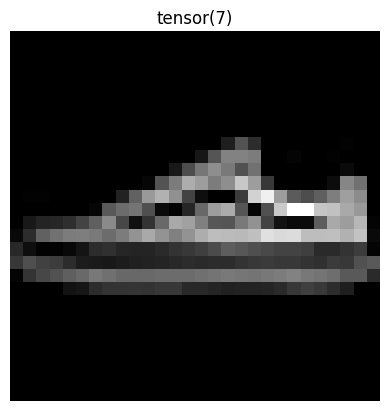

In [33]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)